# Descarga y exploración del corpus

In [ ]:
#Librerias
import pandas as pd 
import numpy as np 
import gzip
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import string


In [ ]:
#Proceso de como se obtuvieron las 20k reseñas. No es necesario ejecutarlo solo es una demostración:
with gzip.open('/content/Video_Games.json.gz', 'rb') as f:
  df = pd.read_json(f, lines=True)

# Para evitar el riesgo de desequilibrio de clases, muestrearemos aleatoriamente 5000 muestras de datos para cada valor (1,2,4,5)
# Filtre los datos según los valores deseados en la columna 'general'
filtered_df = df[df['overall'].isin([1, 2, 4, 5])]

#Muestra el mismo número de filas para cada valor:
num_samples = 5000
sampled_df_1 = filtered_df[filtered_df['overall'] == 1].sample(n=num_samples)
sampled_df_2 = filtered_df[filtered_df['overall'] == 2].sample(n=num_samples)
sampled_df_4 = filtered_df[filtered_df['overall'] == 4].sample(n=num_samples)
sampled_df_5 = filtered_df[filtered_df['overall'] == 5].sample(n=num_samples)

#Concatenar los conjuntos de datos resultantes
result_df = pd.concat([sampled_df_1, sampled_df_2, sampled_df_4, sampled_df_5])

#Exportar el dataset a un nuevo archivo CSV para facilitar el acceso para la próxima iteración:
result_df.to_csv('sampled_data_file.csv', index=False)

In [ ]:
#Cargar el dataset de videojuegos:
df = pd.read_csv('/content/sampled_data_file.csv')

In [ ]:
#Revisar que se cargo bien, usando head para ver las primeras observaciones:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,4,True,"01 20, 2012",A2345DQDQ6VZ1F,B0057PERTS,Van,This is a pretty good game! My daughter loves ...,FUN FUN!!!,1327017600,NaN,{'Format:': ' Video Game'},NaN
1,5,False,"11 9, 2009",AJ92DU5T9WUJ3,B001TOMR0M,byteman,"First, let's clear one thing up and remember t...",Great addition the franchise; includes some ma...,1257724800,33.0,{'Platform:': ' PlayStation 3'},NaN
2,1,True,"03 24, 2011",A3U90ZCN54JSG7,B0015LMOTS,Ari,The blue button stopped working very quickly. ...,Broke very quickly,1300924800,2.0,NaN,NaN
3,2,False,"09 4, 2006",AIUXSQF5L5NRH,B000E0L424,PSP Player,I have never played any games in the SC series...,Very disappointing game,1157328000,2.0,NaN,NaN
4,2,True,"11 11, 2016",A27HZ2C0L6GP3D,B0050SXLQC,Gustavo Len,this is a no no,Two Stars,1478822400,NaN,{'Format:': ' Video Game'},NaN


#Cardinalidad del vocabulario

In [ ]:
#Crea un data frame con solo las reseñas:
text_df = df['reviewText']

#Tokenización del texto
nltk.download('punkt')

palabras = []
for review in text_df:
    palabras.extend(nltk.word_tokenize(review.lower()))


#Contar la frecuencia de cada palabra: 
frecuencia_palabra = {}

for palabra in palabras:
    if palabra not in frecuencia_palabra:
        frecuencia_palabra[palabra] = 1
    else:
        frecuencia_palabra[palabra] += 1

#Ordenar el diccionario por frecuencia
palabras_clasificadas = sorted(frecuencia_palabra.items(), key=lambda x: x[1], reverse=True)

#Calcular la cardinalidad del vocabulario
cardinalidad = len(frecuencia_palabra)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#Cardinalidad
print(cardinalidad)

40358


El número de palabras únicas en nuestro corpus es 40358:

In [ ]:
#Ordenar el diccionario por frecuencia:
palabras_clasificadas = sorted(frecuencia_palabra.items(), key=lambda x: x[1], reverse=True)

#Las 20 palabras más frecuentes:
for word, freq in palabras_clasificadas[:20]:
    print(f"{word}: {freq}")

.: 92853
the: 90977
,: 65030
i: 45857
to: 45847
and: 45503
a: 41386
it: 40408
is: 29310
of: 28967
you: 26048
game: 25358
this: 24521
for: 19246
that: 18474
in: 17876
but: 14348
n't: 13843
with: 13375
not: 13323


In [ ]:
#Deshacerse de las palabras vacías y la puntuación en la lista:
nltk.download('stopwords')
stopwords = stopwords.words('english')
pontuación = ['.', ',', '!', '(', ')', "''", ':', "``", '...']

palabras_sin_stopwords =  [(palabra, num) for (palabra, num) in palabras_clasificadas if palabra.lower() not in stopwords]
palabras_sin_pontuación = [(palabra, num) for (palabra,num) in palabras_sin_stopwords if palabra.lower() not in pontuación]

#Las 20 palabras más frecuentes:
for word, freq in palabras_sin_pontuación[:20]:
    print(f"{word}: {freq}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


game: 25358
n't: 13843
's: 10939
like: 7450
one: 6931
get: 5895
play: 5658
games: 5481
great: 5143
good: 5073
would: 5068
time: 4420
really: 4143
even: 3673
fun: 3614
much: 3248
?: 3108
well: 3054
first: 2961
work: 2934


#Distribución de reviews por número de estrellas

In [ ]:
#Obtener la distribución de reseñas para cada estrella:
review_counts = df['overall'].value_counts()
print(review_counts)

4    5000
5    5000
1    5000
2    5000
Name: overall, dtype: int64


Text(0, 0.5, 'Número de reviews')

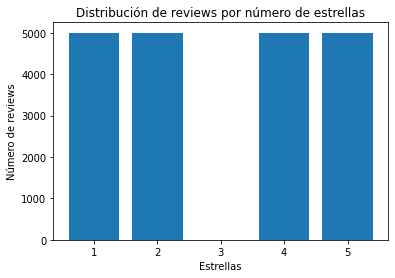

In [ ]:
#Visualización de la distribución:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(review_counts.index, review_counts.values)

#Establecer el título del gráfico y las etiquetas de los ejes:
ax.set_title('Distribución de reviews por número de estrellas')
ax.set_xlabel('Estrellas')
ax.set_ylabel('Número de reviews')

# Nº de reviews positivas y negativas

In [ ]:
#Consideraremos 1 a 2 como malas críticas y 4 a 5 como buenas:
#Número de críticas positivas y negativas:
positivas = (df['overall'] >= 4).sum()
negativas = (df['overall'] <= 2).sum()

#Resultados:
print(f"Nº de reviews positivas: {positivas}")
print(f"Nº de reviews negativas: {negativas}")

Nº de reviews positivas: 10000
Nº de reviews negativas: 10000


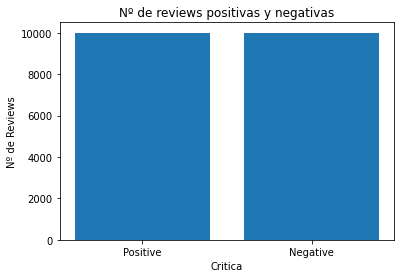

In [ ]:
#Visualización:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(['Positive', 'Negative'], [positivas, negativas])

#Establecer el título del gráfico y las etiquetas de los ejes:
ax.set_title('Nº de reviews positivas y negativas')
ax.set_xlabel('Sentimiento')
ax.set_ylabel('Nº de Reviews')

#Ver el gráfico:
plt.show()

# Nubes de palabras

In [ ]:
#Uniendo todas las reseñas en una sola cadena:
text = ' '.join(df['reviewText'].fillna('').values)

#Crear y generar la nube de palabras:
nubes = WordCloud(width=800, height=800, background_color='white').generate(text)

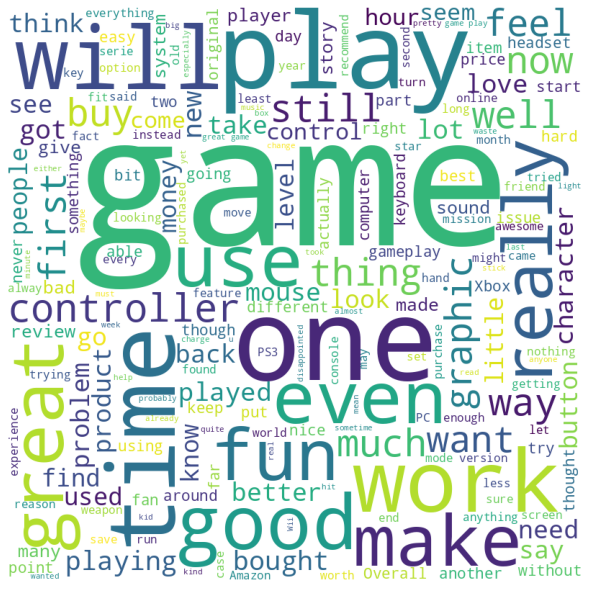

In [ ]:
#Visualización de la nube de palabras:
fig = plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(nubes)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Word2Vec

In [ ]:
# Visualización en 2 dimensiones de algunas incrustaciones de palabras calculadas con
# Word2Vec: en este caso toma 5 palabras y grafica las 10 más similares:

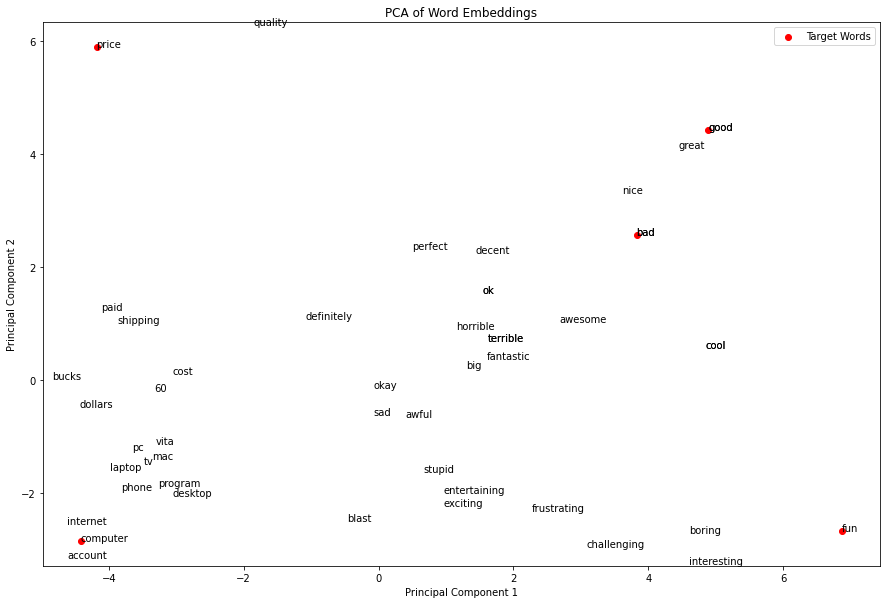

In [ ]:
#Uniendo todas las reseñas en una lista de oraciones:
frases = [str(review).lower().split() for review in df['reviewText'].fillna('').values]
frases_clean = []
for frase in frases:
    #Eliminar puntuación:
    frase_no_punct = [word.translate(str.maketrans('', '', string.punctuation)) for word in frase]
    frases_clean.append(frase_no_punct)

#Entrenar el modelo de Word2Vec en las oraciones:
model = Word2Vec(frases_clean, size=100, window=5, min_count=5, workers=4)

#Eligiendo 5 palabras:
palabra_ob = ['good', 'bad', 'price', 'computer', 'fun']

#Calcular las 10 palabras más similares para cada palabra:
similares = {}
for target in palabra_ob:
    similares[target] = [word for word, _ in model.wv.most_similar(target, topn=10)]

#Calcular el PCA de las palabras y sus palabras similares:
words = palabra_ob + [word for words in similares.values() for word in words]
embeddings = model.wv[words]
pca = PCA(n_components=2)
principal_components = pca.fit_transform(embeddings)

#Graficar PCA de la palabras:
fig, ax = plt.subplots()
ax.scatter(principal_components[:5, 0], principal_components[:5, 1], color='red', label='Target Words')
for i, target in enumerate(palabra_ob):
    ax.annotate(target, (principal_components[i, 0], principal_components[i, 1]))
for i, word in enumerate(words[5:]):
    ax.annotate(word, (principal_components[i+5, 0], principal_components[i+5, 1]))
fig.set_figheight(10)
fig.set_figwidth(15)
ax.set_title('PCA of Word Embeddings')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.legend()

#Visualización:
plt.show()

In [ ]:
#Las palabras y sus similares:
model.wv.most_similar('bad', topn=10)

[('good', 0.7233414053916931),
 ('terrible', 0.6863477230072021),
 ('ok', 0.6702015399932861),
 ('stupid', 0.6690864562988281),
 ('horrible', 0.6189554929733276),
 ('okay', 0.5968927145004272),
 ('cool', 0.5905933976173401),
 ('sad', 0.5756788849830627),
 ('big', 0.5691892504692078),
 ('awful', 0.5566908717155457)]

In [ ]:
model.wv.most_similar('computer', topn=10)

[('phone', 0.7771359086036682),
 ('laptop', 0.7714173197746277),
 ('internet', 0.7562991976737976),
 ('desktop', 0.7420386075973511),
 ('mac', 0.7275263667106628),
 ('account', 0.7229359149932861),
 ('pc', 0.7029720544815063),
 ('tv', 0.6924605369567871),
 ('program', 0.6688740253448486),
 ('vita', 0.6661564111709595)]

In [ ]:
model.wv.most_similar('price', topn=10)

[('cost', 0.659454345703125),
 ('dollars', 0.621932864189148),
 ('product', 0.6200782656669617),
 ('definitely', 0.6109167337417603),
 ('headset', 0.609840989112854),
 ('bucks', 0.595834493637085),
 ('60', 0.5899759531021118),
 ('paid', 0.5893588066101074),
 ('shipping', 0.586583137512207),
 ('quality', 0.5861340165138245)]

In [ ]:
model.wv.most_similar('good', topn=10)

[('great', 0.804153561592102),
 ('cool', 0.7345322370529175),
 ('bad', 0.7233414053916931),
 ('decent', 0.7220852375030518),
 ('ok', 0.7080982327461243),
 ('nice', 0.6853567361831665),
 ('perfect', 0.672458291053772),
 ('fantastic', 0.6575681567192078),
 ('terrible', 0.6487842798233032),
 ('awesome', 0.635299563407898)]

In [ ]:
model.wv.most_similar('fun', topn=10)

[('challenging', 0.692748486995697),
 ('boring', 0.6607865691184998),
 ('entertaining', 0.648343026638031),
 ('interesting', 0.6181256771087646),
 ('story', 0.6042633652687073),
 ('multiplayer', 0.597000241279602),
 ('frustrating', 0.596858561038971),
 ('exciting', 0.5963225960731506),
 ('blast', 0.5803292989730835),
 ('action', 0.5775868892669678)]

# Tamaño medio de la reseña





Promedio de palabras por reseña: 84.81
Número máximo de palabras en una reseña: 4142
Número mínimo de palabras en una reseña: 1


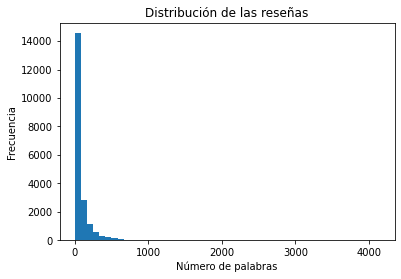

In [ ]:
#Definir una función para contar el número de palabras en un string:
def count_words(text):
    return len(text.split())

#Aplique la función word_count a cada fila de la columna 'reviewText':
df['word_count'] = df['reviewText'].apply(count_words)

#Calcule el número promedio, máximo y mínimo de palabras en la columna 'reviewText':
avg_word_count = df['word_count'].mean()
max_word_count = df['word_count'].max()
min_word_count = df['word_count'].min()

#Resultados:
print("Promedio de palabras por reseña: {:.2f}".format(avg_word_count))
print("Número máximo de palabras en una reseña: {}".format(max_word_count))
print("Número mínimo de palabras en una reseña: {}".format(min_word_count))

#Histograma:
plt.hist(df['word_count'], bins=50)
plt.xlabel('Número de palabras')
plt.ylabel('Frecuencia')
plt.title('Distribución de las reseñas')
plt.show()

# Conclusiones de la exploración

Después de analizar un corpus de 20k reseñas de videojuegos de Amazon, se descubrió que las palabras más utilizadas eran "game", "like", "great", "one", "games", "play", "good", "get", "would", "really", "fun", "time", "even", "much", "well", "also", "new", and "first", con un total de 40,358 palabras únicas en el corpus. 

El número medio, máximo y mínimo de palabras por reseña fue de 84.81,4142 y 1, respectivamente. Esto indica que, en promedio, cada reseña es relativamente larga, con casi 85 palabras por reseña. Esto podría sugerir que las reseñas contienen muchos detalles u opiniones que podrían ser útiles para el análisis de opiniones, pero también podría significar que algunas reseñas son demasiado repetitivas.

Para evitar un desequilibrio, tomamos una muestra aletoria de 5000 reseñas, lo cual va a permitir que haga generalizaciones más precisas sobre el sentimiento en las reseñas.

Al Word2Vec para la similutid de palabras encontré que la palabra "good" es más similar a "great", "decent", and "cool", mientras que la palabra "bad" es más similar a "good", "okay" y "big". Curiosamente, la palabra "diversión" es más similar a "challenging", "enjoyable" y "blast".

En general, las reseñas son positivos acerca de sus experiencias con los videojuegos. Las palabras más comunes utilizadas en las reseñas positivas son "great" y "fun" que aparecen con frecuencia. 

Los resultados del análisis de Word2Vec sugieren que algunas palabras que podrían considerarse opuestas, como "good" y "bad", en realidad se usan en contextos similares en estas reseñas. Esto podría deberse a la naturaleza subjetiva de las reseñas, en las que una "bad" experiencia para una persona puede no ser necesariamente la misma para otra.